<a href="https://colab.research.google.com/github/H5Y0UNG/20_group/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B54%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.

# SGD 확률적 경사 하강법

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

그림 저장: sgd_plot


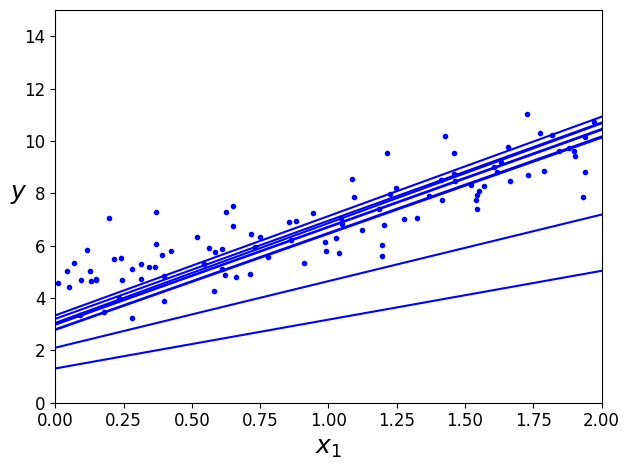

In [ ]:
epochs = 50 # 에폭 수
t0, t1 = 10, 100  # 학습 스케줄 하이퍼파라미터 (사용자가 수정 가능함)

def lr_schedule(t): # 입력으로 들어오는 t는 점점 커지며 return값인 eta(학습률)은 점점 작아진다.
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 세타를 랜덤으로 설정함

for epoch in range(epochs):
    for i in range(m):                               # 하나의 에폭 당 100개의 랜덤 값을 뽑는다.
        if epoch == 0 and i < 10:                    # 첫 에폭일 때 plot을 10번 그린다.
            y_predict = X_new_b.dot(theta)           # 예측
            style = "b-" if i > 0 else "r--"         # 첫번째 예측 값을 빨간선으로 그리고 그 이후는 파란색 선으로 그린다.
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)          # m범위 안에서 랜덤값을 뽑기
        xi = X_b[random_index:random_index+1]        # 입력 값
        yi = y[random_index:random_index+1]          # 실제 데이터 값
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 그래디언트 구하는 공식
        eta = lr_schedule(epoch * m + i)       # 학습률 계산하기 (SGD이기 때문에 eta는 점점 작아진다)
        theta = theta - eta * gradients              # 세타 계산하기
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()

In [ ]:
#dataset이 1000개, mini batch size가 50개, epoch은 100번이면 가중치수정은 몇번일어날까?
# 의견1 : 2000번 일어난다.
# 이유 : 배치학습 한번에 가중치수정이 한번 일어나기 때문에 1에폭당 배치개수는 dataset개수 1000개 / batch size개수 50개 = 20이고 에폭 수는 100번이기 때문에 20*100=2000번이다.

질문 1. 랜덤경사하강법에서 전체 데이터 수인 m만큼 반복을 하는데 그러면 배치경사하강법과 다를게 없지 않는가?

답 1. 랜덤경사하강법의 경우 중복을 허용한 랜덤값 1개를 뽑아 계산하기 때문에 모든 데이터포인트를 계산하는 배치경사하강법과는 다르다.


문제 1. 000개 미니배치 50 epoch = 100일 때 가중치 수정 횟수?

답 1. 1번의 epoch동안 50개의 미니배치를 돌리며 가중치를 수정하기 때문에 100*50 = 5000일 것이다.
답 2. 1000개의 데이터를 크기 50인 미니배치로 나누기 때문에 20개의 미니배치수 * 에폭수만큼 가중치를 수정하기 때문에 100*20 = 2000일 것이다.